In [7]:
# Import python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

In [69]:
# Uploading CSV file
df=pd.read_csv(r"C:\Users\Zahid\OneDrive\Desktop\Excel & Power bi\excel data\Project\Diwali Project\Diwali Sales Data.csv", encoding = "unicode_escape")

# Data Cleaning

In [70]:
# Check total number of rows and columns
df.shape

(11251, 15)

In [10]:
# Print our data(by default head always shows 1st five entries)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
# Describes information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


In [12]:
# Create a copy of dataset so that we can safegaurd our original dataset if anything goes wrong
dff = df.copy()

In [13]:
# Remove empty columns
dff.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [14]:
# Check the data matrix if columns got removed or not
dff.shape

(11251, 13)

In [15]:
# Check total null number of null values in every column
dff.isnull().sum()    

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
# Remove these 12 null values
dff.dropna(inplace=True)


In [17]:
# Confirm null values are removed
dff.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [18]:
# Check statistical values of numerical data
dff[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploration of Data

In [19]:
# List of columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

## Product

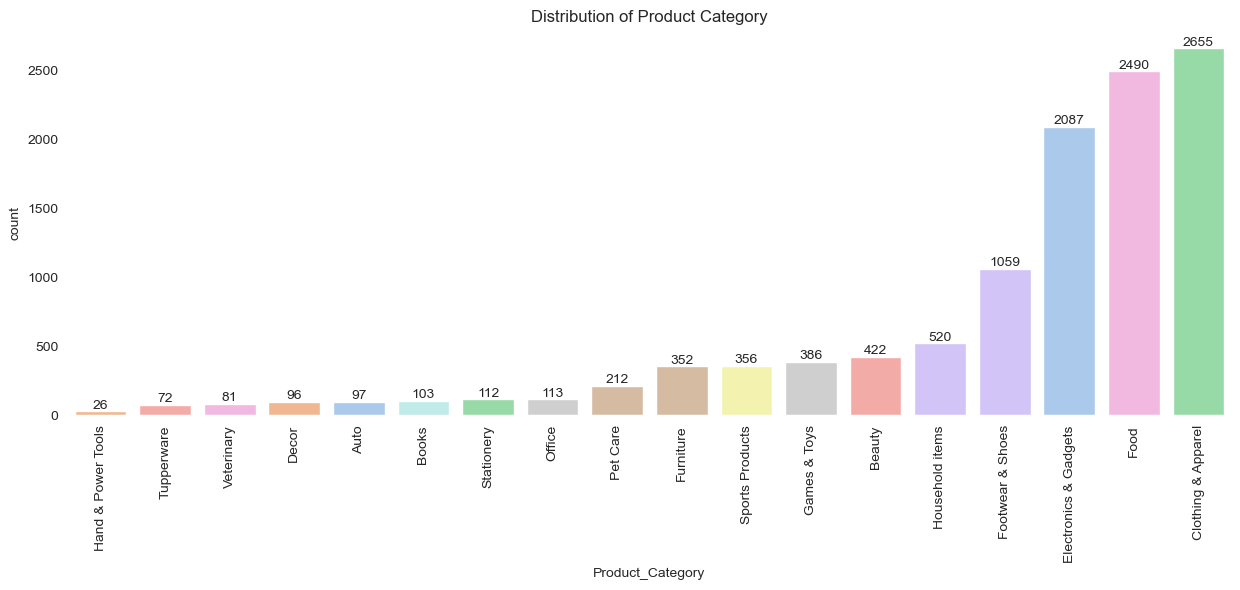

In [95]:
plt.figure(figsize=(15,5))
sorted_categories = dff['Product_Category'].value_counts().sort_values(ascending=True).index
ax = sns.countplot(x = 'Product_Category', data = dff, hue = 'Product_Category',  order = sorted_categories, palette = "pastel")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Product Category')
ax.set_facecolor('white') 
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()


**Findings about Distribution of Product Category**                                                                              
The most frequently purchased product categories are **Clothing & Apparel, Food and Electronics & Gadets**, indicating high demand. The least purchased categories might need marketing efforts or discounts to boost sales.

**Recommendations & Methods to Improve:**                                                                                               
*Bundle offers*: Combine slow-selling products with popular ones.

*Discount campaigns*: Offer discounts on low-selling categories to increase demand.

*Market research*: Identify why some categories are performing poorly

In [61]:
productcatbyamt=dff.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by = 'Amount', ascending = True)
productcatbyamt


,Product_Category,Amount
12,Office,81936.00
17,Veterinary,112702.00
10,Hand & Power Tools,405618.00
13,Pet Care,482277.00
4,Decor,730360.00
2,Books,1061478.00
16,Tupperware,1155642.00
11,Household items,1569337.00
15,Stationery,1676051.50
0,Auto,1958609.99


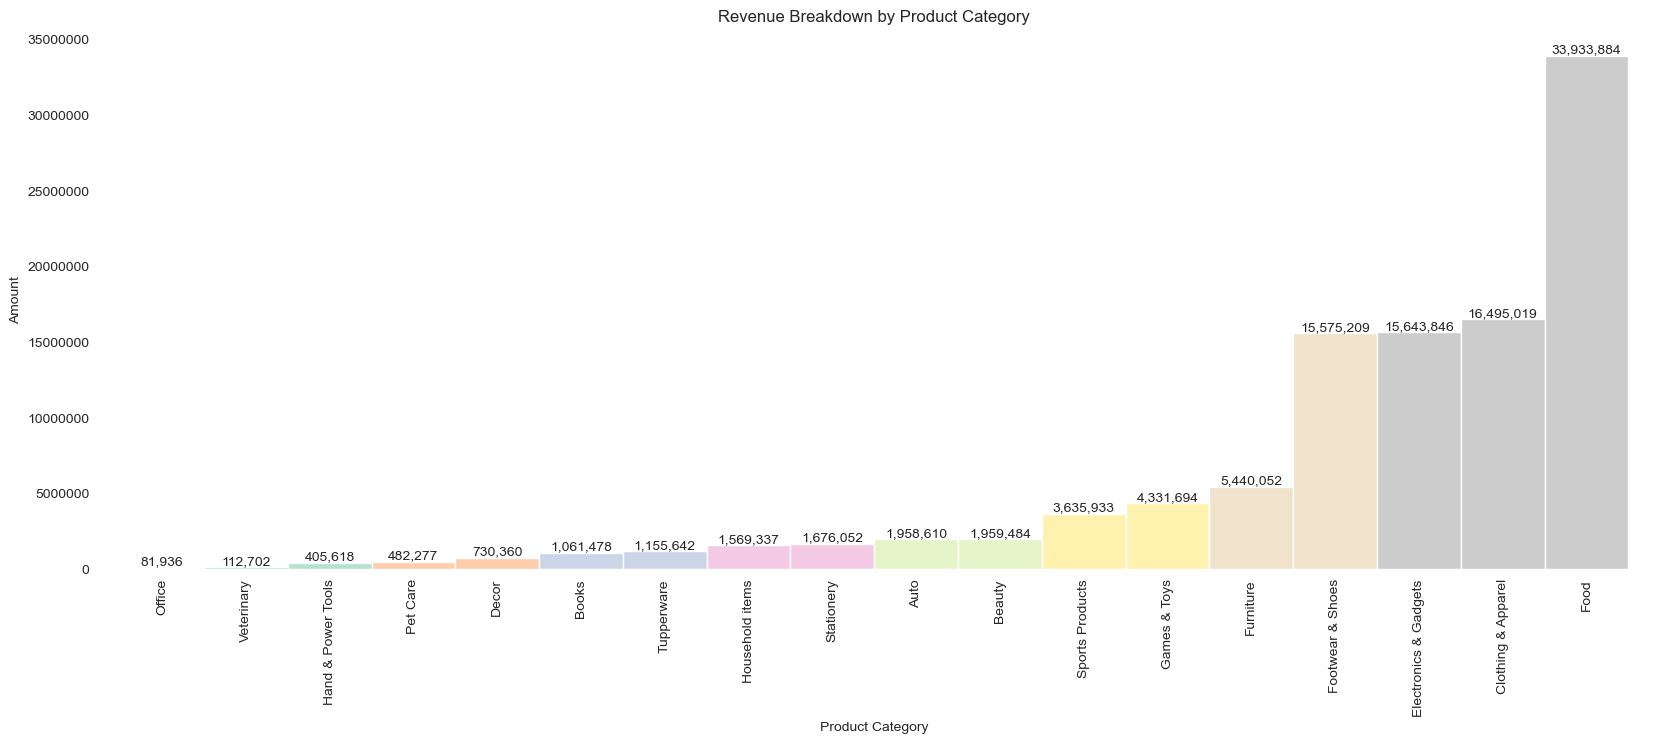

In [100]:
productcatbyamt_unsorted=dff.groupby('Product_Category')['Amount'].sum().sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(20, 7))
colors = plt.cm.Pastel2(np.linspace(0, 1, len(productcatbyamt_unsorted)))
ax.set_facecolor('white') 
ax = productcatbyamt_unsorted.plot(kind = 'bar', color = colors , width = 1)
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.grid(False)
plt.title("Revenue Breakdown by Product Category")
for bars in ax.containers:
    ax.bar_label(bars,fmt='{:,.0f}')
ax.ticklabel_format(style='plain', axis='y') 
plt.show()

**Findings about Revenue Breakdown by Product Category**                                                                       
**Clothing & Apparel, Food and Electronics & Gadets** contribute the most to revenue, while **Office, Veterinary and Hand& Power Tools** generate the least. 

**Recommendations & Methods to Improve**                                                                                                     
*Increase pricing strategy*for categories with high sales but low revenue(like Clothing and Apparels)

*Upsell and cross-sell* premium versions of popular products.

*Targeted marketing* for high-revenue categories to increase their reach.

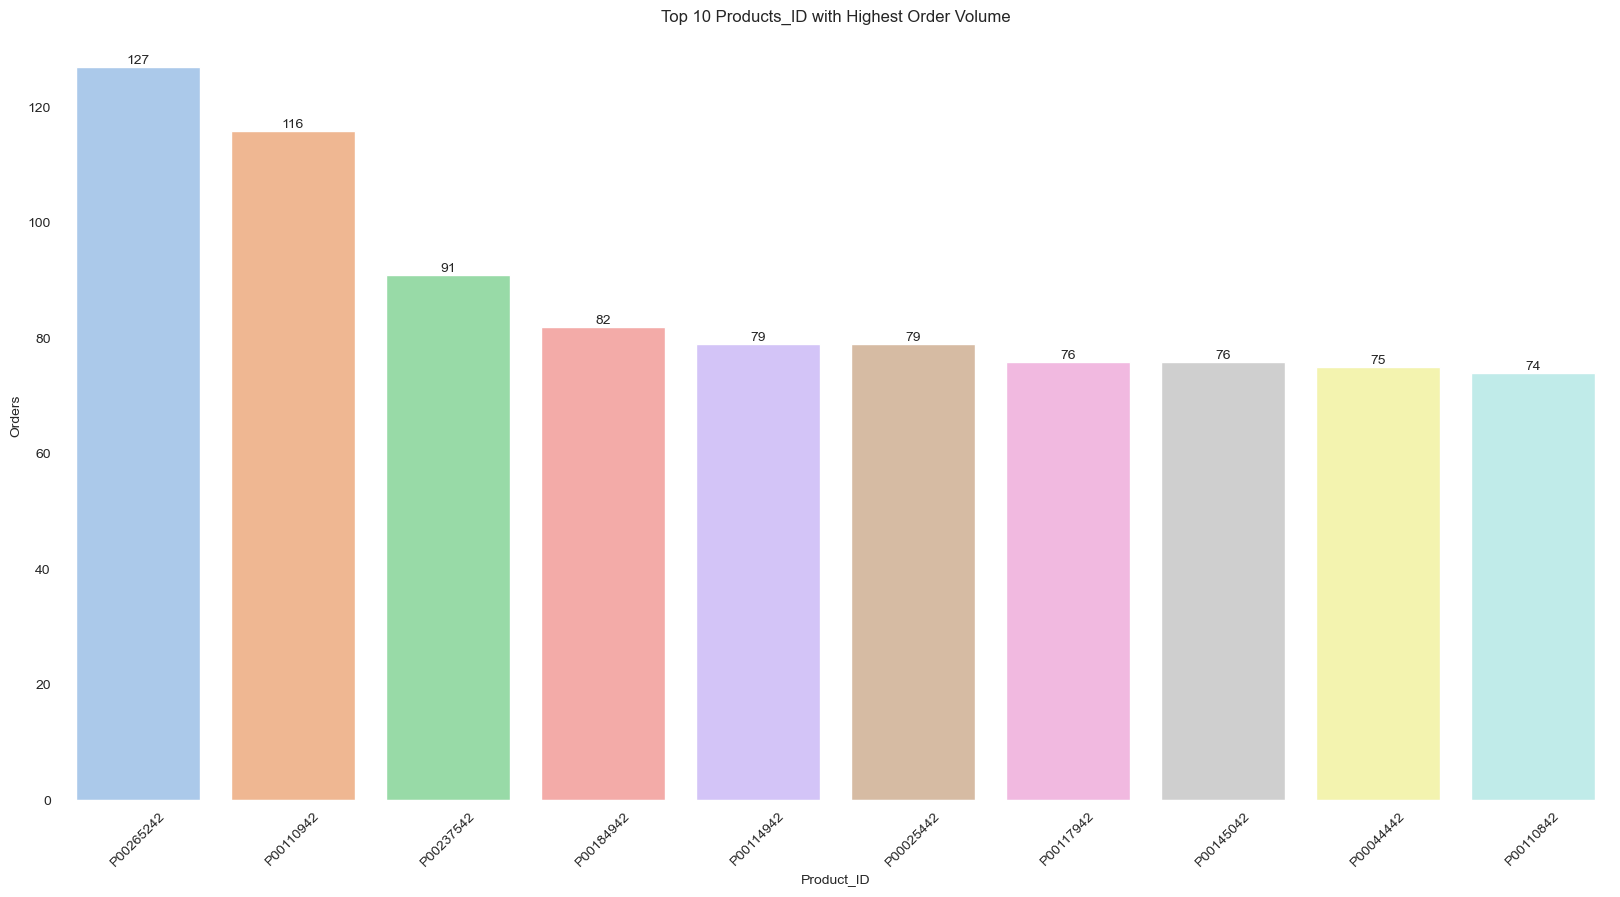

In [89]:
plt.figure(figsize = (20,10))
sales_state=dff.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
colors = sns.color_palette("pastel", len(sales_state))
ax = sns.barplot(data=sales_state, x = 'Product_ID', y = 'Orders', hue = "Product_ID", palette = colors, width = 0.8)
plt.xticks(rotation = 90)
plt.title("Top 10 Products_ID with Highest Order Volume")
plt.grid(False)
for bars in ax.containers:
    ax.bar_label(bars,fmt='{:,.0f}')
ax.set_facecolor("white")
plt.xticks(rotation = 45)
plt.show()

**Findings about Top 10 Products_ID with Highest Order Volume**                                                                  
Product ID P00265242 is the highest-selling product **127** orders. The top 5 products dominate sales, indicating customer preference.
Sales drop slightly after the top 3 products, suggesting demand is spread across multiple items.

**Recommendations & Methods to Improve**                                                                               
Identify the exact products behind these IDs and promote them more.

Bundle the best-selling products with related items to boost average order value.

Offer limited-time discounts on slightly lower-selling products to push sales.

Use customer reviews & ratings to highlight these products in advertisements.

## Gender

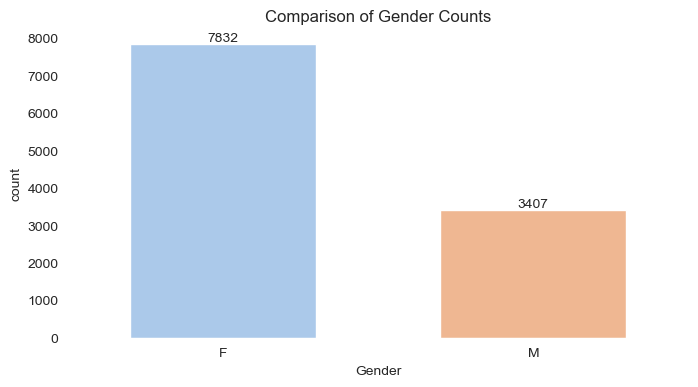

In [93]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Gender', data=dff, hue="Gender", palette="pastel", width=0.6)  # Light colors
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Comparison of Gender Counts")
ax.set_facecolor('white') 
fig.patch.set_facecolor('white')
plt.grid(False)
plt.show()

**Findings about Comparison of Gender Counts**                                                                                   
There are more **Female** customers in the dataset, indicating that the marketing strategy should align with the dominant gender's preferences while finding ways to attract the underrepresented group.

**Recommendations & Methods to Improve**                                                                                              
*Personalized marketing* based on gender preferences.

*Influencer marketing* to attract the less engaged gender.

*New product lines* catering to underrepresented buyers.

In [317]:
Genderbyamt = dff.groupby('Gender')['Amount'].sum().reset_index().sort_values(by='Amount', ascending = True)
Genderbyamt

,Gender,Amount
1,M,31913276.00
0,F,74335856.43


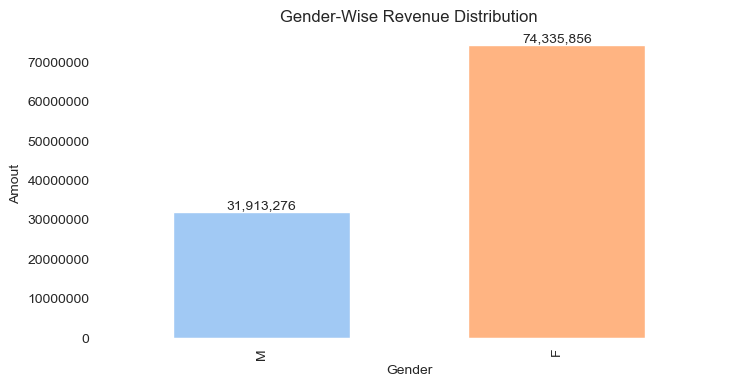

In [146]:
plt.figure(figsize=(8,4))
Genderbyamt_unsorted= dff.groupby('Gender')['Amount'].sum().sort_values( ascending = True)
colors = sns.color_palette("pastel", len(Genderbyamt_unsorted))
ax = Genderbyamt_unsorted.plot(kind= 'bar',color = colors, width = 0.6)
plt.title("Gender-Wise Revenue Distribution")
plt.xlabel('Gender')
plt.ylabel('Amout')
plt.grid(False)
for bars in ax.containers:
    ax.bar_label(bars,fmt='{:,.0f}')
ax.set_facecolor('white')
ax.ticklabel_format(style='plain', axis='y')  
plt.show()

**Findings about Gender-Wise Revenue Distribution**                                                                             
Although **Females** have more transactions, **Females** generates more revenue, implying they purchase higher-value items. Marketing campaigns should target high-value buyers while increasing engagement with the other gender.

**Recommendations & Methods to Improve**                                                                                                    
*Loyalty programs* to encourage repeat purchases.

*Premium product offering* targeted at high-spending groups.

*Gender-specific discounts* to boost sales.

In [108]:
Productpref_bygender = dff.groupby(['Product_Category' , 'Gender'])['Orders'].sum().reset_index().sort_values(by = 'Orders', ascending = True)
Productpref_bygender

,Product_Category,Gender,Orders
20,Hand & Power Tools,F,33
9,Decor,M,43
33,Tupperware,M,45
21,Hand & Power Tools,M,47
35,Veterinary,M,51
1,Auto,M,77
25,Office,M,95
4,Books,F,96
32,Tupperware,F,121
31,Stationery,M,123


## Age

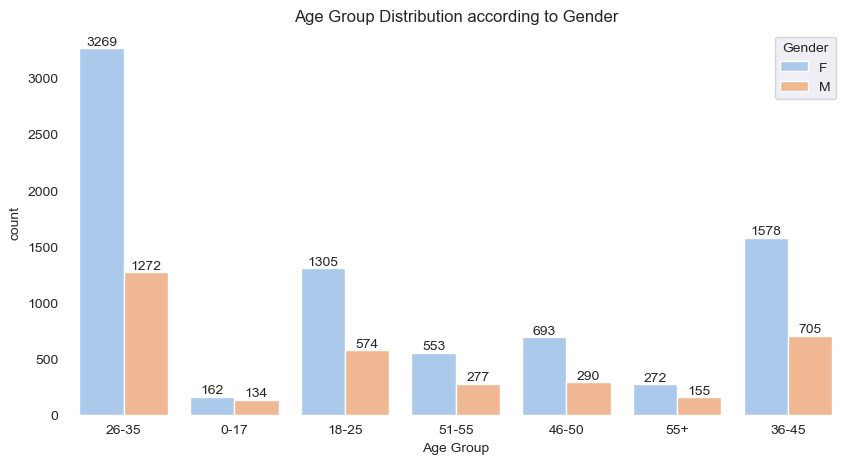

In [46]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Age Group', data = dff, hue = 'Gender', palette="pastel")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Age Group Distribution according to Gender')
ax.set_facecolor('white') 
plt.grid(False)
plt.show()

**Findings about Age Group Distribution according to gender**                                                             
The most active shoppers are in the **26-35** range, meaning this age group should be the focus of promotions. The least active age groups might need different engagement strategies.

**Recommendations & Methods to Improve**                                                                              
*Social media marketing* targeting young customers.

*Referral programs* to attract older customers.

*Customize product recommendations* based on age group preferences.

In [25]:
amtbyage= dff.groupby('Age Group')['Amount'].sum().reset_index().sort_values(by='Amount', ascending = True)
amtbyage

,Age Group,Amount
0,0-17,2699653.00
6,55+,4080987.00
5,51-55,8261477.00
4,46-50,9207844.00
1,18-25,17240732.00
3,36-45,22144995.49
2,26-35,42613443.94


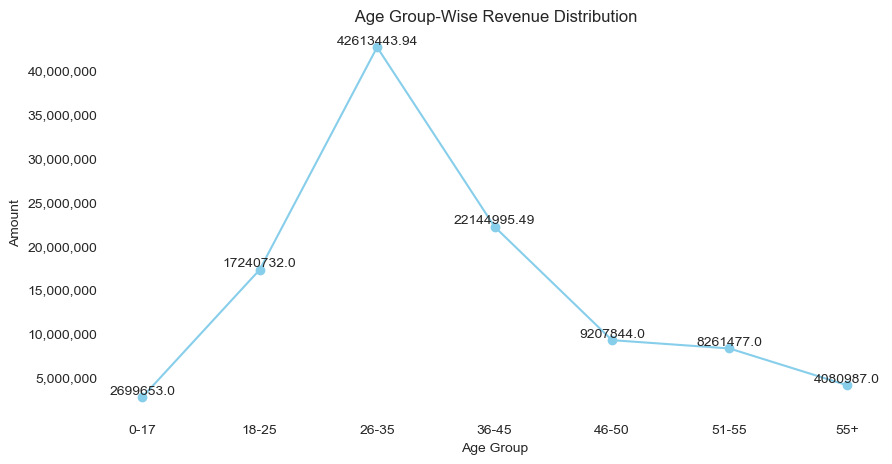

In [81]:
plt.figure(figsize=(10,5))
agebyamtunsorted = dff.groupby('Age Group')['Amount'].sum()
ax = agebyamtunsorted.plot(kind= 'line', marker = 'o',color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title(' Age Group-Wise Revenue Distribution')
ax.set_facecolor('white') 
plt.grid(False)
for i, value in enumerate(agebyamtunsorted):
    plt.text(i, value, str(value), ha='center', va='bottom')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')) 
plt.show()

**Findings about Age Group-Wise Revenue Distribution**                                                                          
**26-35** generates the highest revenue, suggesting they have a higher purchasing power. Tailored promotions for this group could further increase sales.

**Recommendations & Methods to Improve**                                                                                                
*Exclusive offers* for high-value buyers.

*EMI and financing options* for high-priced products.

*Loyalty benefits* for frequent low-value buyers.

## Marital Status 


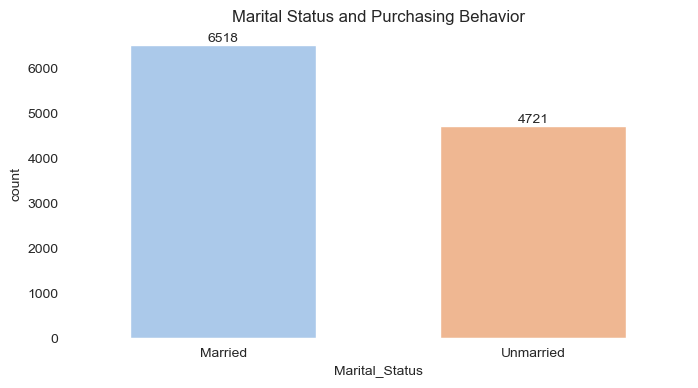

In [83]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = 'Marital_Status', data = dff, hue = "Marital_Status" , palette="pastel",width = 0.6)
plt.title("Marital Status and Purchasing Behavior")
plt.grid(False)
ax.set_facecolor('white')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show() 

**Findings about Marital Status and purchasing behavior**                                                                             
**Married** individuals tend to shop more, possibly because of (family needs, disposable income, etc.).  Promotions can be customized accordingly.

**Recommendations & Methods to Improve**                                                                                           
*Family combo deals* for married customers.

*Gift-oriented marketing* for unmarried individuals.

*Custom promotions* based on life stages (e.g., wedding discouts)

In [28]:
TA_by_MS_Gndr = dff.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index().sort_values(by= 'Amount', ascending = True)
TA_by_MS_Gndr

,Marital_Status,Gender,Amount
3,Unmarried,M,13574538.00
1,Married,M,18338738.00
2,Unmarried,F,30549207.99
0,Married,F,43786648.44


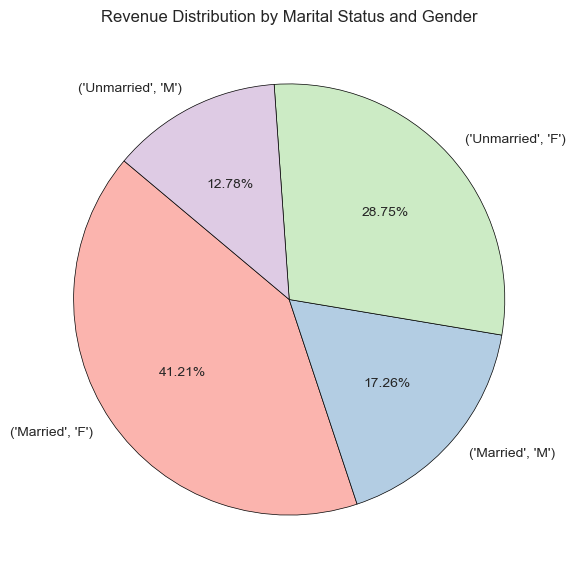

In [29]:
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
piechart= dff.groupby(['Marital_Status', 'Gender'])['Amount'].sum()
plt.title("Revenue Distribution by Marital Status and Gender")
plt.pie(piechart, labels =piechart.index, autopct = "%1.2f%%", colors=sns.color_palette("Pastel1"), startangle = 140, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.show()

**Findings about Revenue Distribution by Marital Status and Gender**                                                         
**Married Female** customers contribute the highest revenue than all the others(including Married Male, unmarried Male or Female).Married customers may be buying family-oriented or high-value products

**Recommendations and Methods to improve**                                                                                                        
*Target married customers* with family combo deals, home appliances, and premium gift sets.

*Launch exclusive Diwali* offers for women, focusing on fashion, beauty, and festive decor.

*Personalized marketing campaigns* (e.g., email and social media) to attract high-spending female

## Region

In [32]:
ordersbystate = dff.groupby('State')['Orders'].sum().reset_index().sort_values(by="Orders", ascending = False )
ordersbystate

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


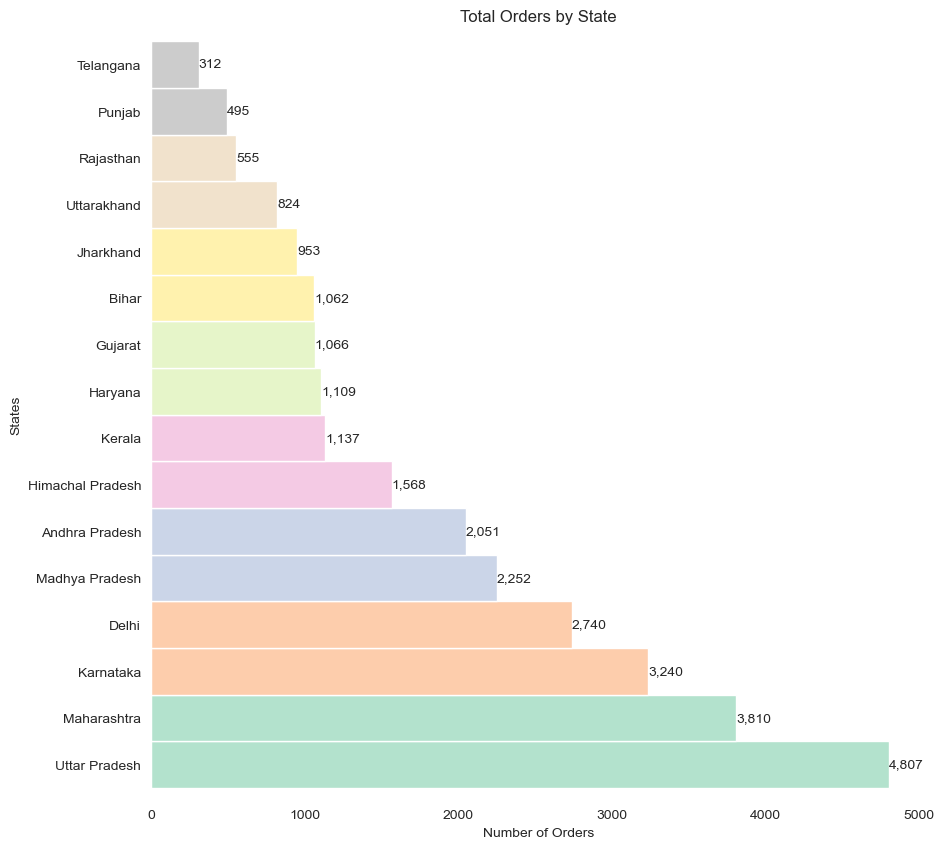

In [104]:
fig,ax = plt.subplots(figsize=(10,10), facecolor='white')
ordersbystate_unsorted = dff.groupby('State')['Orders'].sum().sort_values(ascending = False)
colors = plt.cm.Pastel2(np.linspace(0, 1, len(ordersbystate_unsorted)))
ordersbystate_unsorted.plot(kind= 'barh',color=colors,x = "State",y="Orders",ax=ax, width=1)
ax.set_facecolor('white')
plt.title('Total Orders by State')
plt.ylabel('States')
plt.xlabel('Number of Orders')
plt.yticks(rotation=360) 
plt.grid(False) 
plt.ticklabel_format(style='plain', axis='x')
for bars in ax.containers:
    ax.bar_label(bars,fmt='{:,.0f}')
plt.show()


**Findings about Total Orders by State**                                                                                                
The highest number of transactions come from **UP and Maharashtra**, indicating strong regional demand. Expansion efforts can focus on these regions while improving engagement in low-performing states.

**Recommendations & Methods to Improve**                                                                                                        
*Localized ads* in low-buying states.

*Festive offers* targeted at high-buying regions.

*Partnerships* with local businesses in underperforming areas.

In [30]:
Salesbystates=dff.groupby('State')['Amount'].sum().reset_index().sort_values(by = 'Amount',ascending=True)
Salesbystates

,State,Amount
13,Telangana,1151490.00
11,Punjab,1525800.00
12,Rajasthan,1909409.00
15,Uttarakhand,2520944.00
6,Jharkhand,3026456.00
8,Kerala,3894491.99
3,Gujarat,3946082.00
1,Bihar,4022757.00
4,Haryana,4220175.00
5,Himachal Pradesh,4963368.00


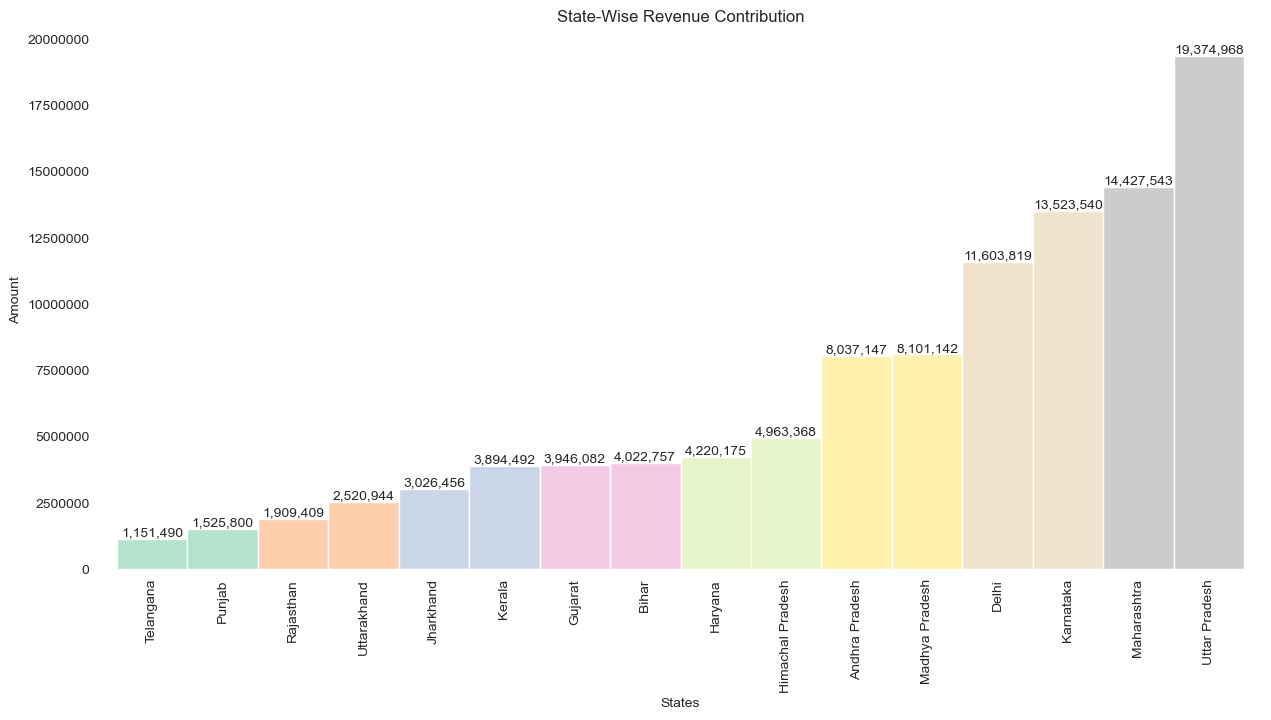

In [105]:
plt.figure(figsize=(15,7))
Salesbystatesunsorted=dff.groupby('State')['Amount'].sum().sort_values(ascending=True)
colors = plt.cm.Pastel2(np.linspace(0, 1, len(Salesbystatesunsorted)))
ax = Salesbystatesunsorted.plot(kind = 'bar',x='State', color = colors, y='Amount', width = 1)
ax.set_facecolor('white') 
plt.title('State-Wise Revenue Contribution')
plt.xlabel('States')
plt.grid(False)
plt.ylabel('Amount')
plt.xticks(rotation=90)
ax.ticklabel_format(style='plain', axis='y')  
for bars in ax.containers:
    ax.bar_label(bars,fmt='{:,.0f}')
plt.show()

**Findings about State-Wise Revenue Contribution**                                                                             
**UP and Maharashtra** contributes more to revenue. This suggests that some states buy higher-value products.

**Recommendations & Methods to Improve**                                                                                                      
*Luxury product targeting* for high-revenue states.

*Cashback offers* to encourage bigger purchases in low-revenue states.

In [34]:
Zonebyamt=dff.groupby('Zone')['Amount'].sum().reset_index().sort_values(by= 'Amount', ascending = True)
Zonebyamt

,Zone,Amount
1,Eastern,7049213.00
2,Northern,12618752.00
4,Western,18373625.00
3,Southern,26606668.98
0,Central,41600873.45


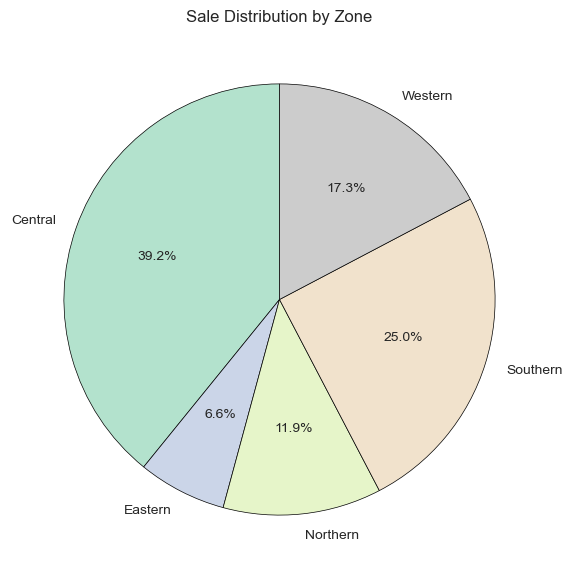

In [35]:
plt.figure(figsize=(7,7))
Zonebyamt_unsorted= Zonebyamt=dff.groupby('Zone')['Amount'].sum()
Zonebyamt_unsorted.plot(kind = 'pie', autopct = '%0.1f%%', startangle= 90, cmap = 'Pastel2', wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})
plt.ylabel('')
plt.title('Sale Distribution by Zone')
plt.show()


**Findings about Sale Distribution by Zone**                                                                               
The **Central Zone** has strong consumer spending, likely due to urban areas.
    
The **Eastern Zone** lags behind, possibly due to lower purchasing power or fewer promotions.
    
**Recommendations & Methods to Improve**                                                                                                    
*Strengthen marketing* in the Eastern Zone with localized promotions and offers.

*Expand delivery & logistics* in underperforming zones to increase accessibility.

*Offer region-specific discounts* or festive campaigns to attract buyers from low-revenue zones.

## Occupation

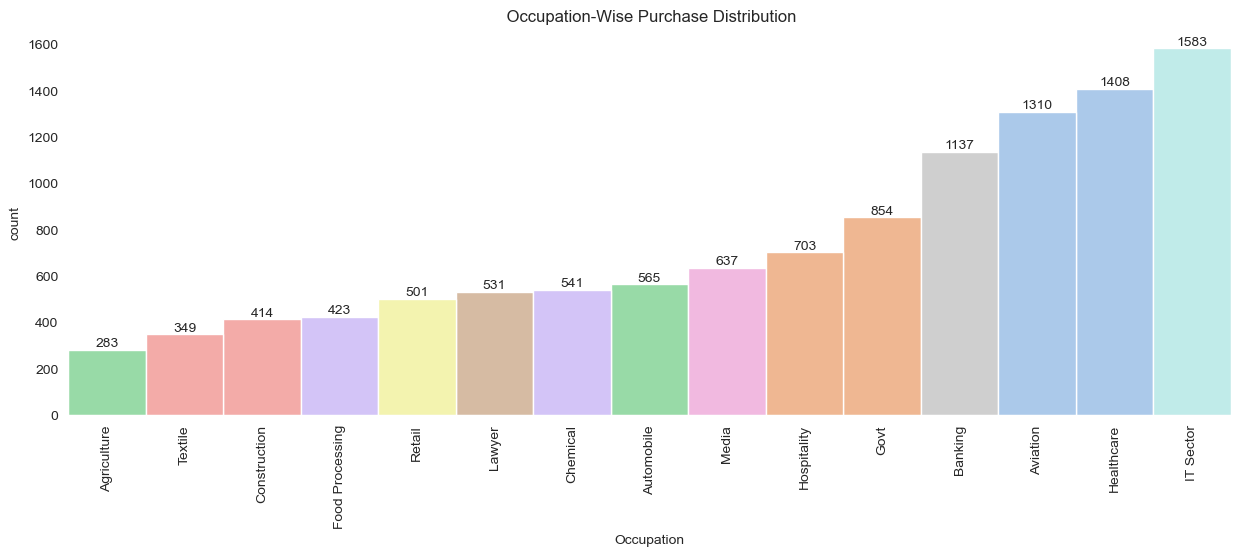

In [84]:
plt.figure(figsize=(15,5))
sorted_occupation = dff['Occupation'].value_counts().sort_values(ascending=True).index
ax=sns.countplot(x= 'Occupation', data = dff, hue = "Occupation", palette = "pastel", order = sorted_occupation, width = 1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title(" Occupation-Wise Purchase Distribution")
plt.xticks(rotation=90)
plt.grid(False)
ax.set_facecolor("white")
plt.show()


 **Findings about Occupation-Wise Purchase Distribution**                                                                     
The highest number of buyers are from the **IT Sector, Healthcare and Aviation** category, meaning product offerings should be aligned with their needs. **Agriculture, Textile, Construction** might need targeted campaigns.

**Recommendations & Methods to Improve**                                                                                                    
*Corporate discount programs* for low-buying occupations.

*LinkedIn ads* and *career-based targeting* for professionals.

*B2B partnerships* for high-buying professions.

In [37]:
Occupationbyamt=dff.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by= 'Amount', ascending = True)
Occupationbyamt

,Occupation,Amount
0,Agriculture,2593087.00
14,Textile,3204972.00
5,Construction,3597511.00
6,Food Processing,4070670.00
13,Retail,4783170.00
11,Lawyer,4981665.00
4,Chemical,5297436.00
1,Automobile,5368596.00
12,Media,6295832.99
9,Hospitality,6376405.00


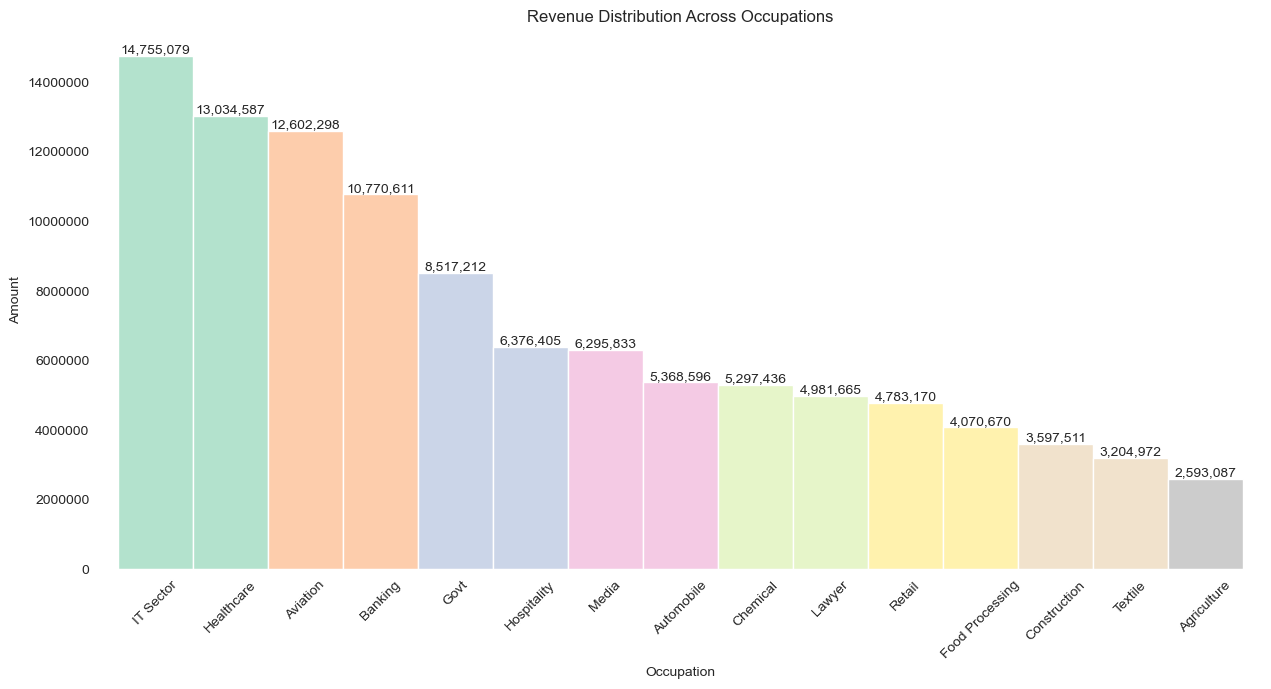

In [106]:
Occupationbyamt_unsorted=dff.groupby('Occupation')['Amount'].sum().sort_values(ascending = False)
plt.figure(figsize=(15,7))
colors = plt.cm.Pastel2(np.linspace(0, 1, len(Salesbystatesunsorted)))
ax = Occupationbyamt_unsorted.plot(kind = 'bar', color = colors, x = 'Occupation', y = 'Amount', width = 1)
plt.title("Revenue Distribution Across Occupations")
plt.xlabel('Occupation')
plt.ylabel('Amount')
plt.grid(False)
ax.set_facecolor('white')
ax.ticklabel_format(style='plain', axis='y')  
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars,fmt='{:,.0f}')
plt.show()

**Findings about Revenue Distribution Across Occupations**                                                                       
While **IT Sector, Healthcare and Aviation** have the most buyers, **IT Sector, Healthcare and Aviation**  contributes the highest revenue, suggesting they purchase high-value products.

**Recommendations & Methods to Improve**                                                                                      
*Premium membership plans* for high-revenue occupations.

*Flexible payment methods* for frequent buyers with low spending.